In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data/pgaTourData.csv')
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$16,943"
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$12,827"
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,159"
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,165"


## Description of the Data

- Player Name: Name of the golfer
- Rounds: The number of games that a player played
- Fairway Percentage: The percentage of time a tee shot lands on the fairway
- Year: The year in which the statistic was collected
- Avg Distance: The average distance of the tee-shot
- gir: (Green in Regulation) is met if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par
- Average Putts: The average number of strokes taken on the green
- Average Scrambling: Scrambling is when a player misses the green in regulation, but still makes par or better on a hole
- Average Score: Average Score is the average of all the scores a player has played in that year
- Points: The number of FedExCup points a player earned in that year. These points can be earned by competing in tournaments.
- Wins: The number of competition a player has won in that year
- Top 10: The number of competitions where a player has placed in the Top 10
- Average SG Putts: Strokes gained: putting measures how many strokes a player gains (or loses) on the greens.
- Average SG Total: The Off-the-tee + approach-the-green + around-the-green + putting statistics combined
- SG:OTT: Strokes gained: off-the-tee measures player performance off the tee on all par-4s and par-5s.
- SG:APR: Strokes gained: approach-the-green measures player performance on approach shots. Approach shots include all shots that are not from the tee on par-4 and par-5 holes and are not included in strokes gained: around-the-green and strokes gained: putting. Approach shots include tee shots on par-3s.
- SG:ARG: Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.
- Money: The amount of prize money a player has earned from tournaments.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [19]:
df.isna().sum()

Player Name              0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top 10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

In [20]:
df['Money'] = df['Money'].str.replace(',', '').str.replace('$', '').astype(float)
df

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9165.0


In [25]:
df.describe()['Wins']

count    293.000000
mean       1.218430
std        0.573443
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: Wins, dtype: float64

In [26]:
df.mask(df.eq(0)).dropna(0, thresh=6).fillna(0)

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0.0,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",0.0,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0.0,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0.0,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,Shane Lowry,0.0,0.00,2015,0.0,0.00,0.00,0.00,0.000,222,1.0,3.0,0.000,0.000,0.000,0.000,0.000,502517.0
2030,Woody Austin,0.0,0.00,2013,0.0,0.00,0.00,0.00,0.000,326,1.0,1.0,0.000,0.000,0.000,0.000,0.000,568800.0
2248,Anthony Kim,0.0,0.00,2010,0.0,0.00,0.00,0.00,0.000,"1,216",1.0,4.0,0.000,0.000,0.000,0.000,0.000,2574921.0
2257,Arjun Atwal,0.0,0.00,2010,0.0,0.00,0.00,0.00,0.000,192,1.0,2.0,0.000,0.000,0.000,0.000,0.000,1507143.0


In [27]:
df.describe()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
count,1678.000000,1678.000000,2312.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,293.000000,1458.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2.300000e+03
mean,78.711561,61.440560,2013.996107,290.807688,65.661675,29.163331,58.115638,70.921961,1.218430,2.781893,0.025641,0.148105,0.037759,0.065015,0.019974,1.124903e+06
std,14.274137,5.058845,2.581176,8.916631,2.745411,0.518468,3.384769,0.698305,0.573443,1.895094,0.343787,0.694923,0.379892,0.380952,0.223361,1.354085e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,1.000000,1.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,5.520000e+03
25%,69.000000,57.942500,2012.000000,284.900000,63.830000,28.810000,55.900000,70.494250,1.000000,1.000000,-0.187000,-0.254750,-0.190250,-0.180750,-0.123000,1.853258e+05
50%,79.500000,61.430000,2014.000000,290.550000,65.790000,29.140000,58.275000,70.902000,1.000000,2.000000,0.040000,0.147000,0.056000,0.081000,0.022000,6.994425e+05
75%,89.000000,64.910000,2016.000000,296.400000,67.580000,29.520000,60.420000,71.342750,1.000000,4.000000,0.257000,0.568500,0.291500,0.314500,0.175000,1.526660e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


In [28]:
df.corr()

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
Rounds,1.000000,0.083597,0.078522,0.069599,0.252190,-0.125943,0.227928,-0.313380,-0.097741,0.211198,0.173218,0.317011,0.164208,0.192764,0.112364,0.278091
Fairway Percentage,0.083597,1.000000,-0.111042,-0.533832,0.343115,0.162757,0.236281,-0.170017,-0.098652,0.024990,-0.043493,0.162458,0.179032,0.155015,0.000356,0.016237
Year,0.078522,-0.111042,1.000000,0.221102,-0.000044,-0.145524,0.107181,-0.006801,0.060289,0.076493,0.023785,0.029939,0.003330,0.009928,0.035493,0.081792
Avg Distance,0.069599,-0.533832,0.221102,1.000000,0.292965,0.167314,-0.228979,-0.273230,0.247126,0.226512,-0.136676,0.278923,0.604456,0.142217,-0.191637,0.329295
gir,0.252190,0.343115,-0.000044,0.292965,1.000000,0.549402,0.038068,-0.485030,0.267357,0.276390,-0.231629,0.487778,0.582466,0.577074,-0.103955,0.313770
Average Putts,-0.125943,0.162757,-0.145524,0.167314,0.549402,1.000000,-0.549805,0.263041,-0.209932,-0.245181,-0.720328,-0.265734,0.293925,0.133635,-0.449081,-0.257832
Average Scrambling,0.227928,0.236281,0.107181,-0.228979,0.038068,-0.549805,1.000000,-0.518057,0.248329,0.311253,0.458220,0.517527,-0.024871,0.196124,0.613776,0.317777
Average Score,-0.313380,-0.170017,-0.006801,-0.273230,-0.485030,0.263041,-0.518057,1.000000,-0.477661,-0.700529,-0.364817,-0.962318,-0.530624,-0.669370,-0.390284,-0.746499
Wins,-0.097741,-0.098652,0.060289,0.247126,0.267357,-0.209932,0.248329,-0.477661,1.000000,0.450695,0.216024,0.470284,0.244059,0.348876,0.217539,0.721482
Top 10,0.211198,0.024990,0.076493,0.226512,0.276390,-0.245181,0.311253,-0.700529,0.450695,1.000000,0.270748,0.695163,0.352702,0.457636,0.254826,0.808836


<AxesSubplot:>

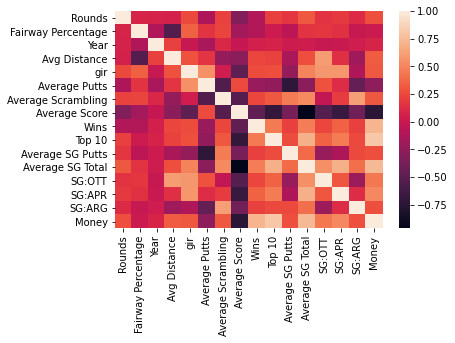

In [29]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

In [32]:
df.corr()['Wins'].sort_values(ascending=False).abs()

Wins                  1.000000
Money                 0.721482
Average SG Total      0.470284
Top 10                0.450695
SG:APR                0.348876
gir                   0.267357
Average Scrambling    0.248329
Avg Distance          0.247126
SG:OTT                0.244059
SG:ARG                0.217539
Average SG Putts      0.216024
Year                  0.060289
Rounds                0.097741
Fairway Percentage    0.098652
Average Putts         0.209932
Average Score         0.477661
Name: Wins, dtype: float64

In [33]:
df.describe()['Wins']

count    293.000000
mean       1.218430
std        0.573443
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: Wins, dtype: float64